In [1]:
from source_code import evaluation
import numpy as np
from source_code.evaluation import *
from source_code.comparison import *

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
np.random.seed(42)

Loading the PIE dataset...
(20, 64, 64)
20
Training RobustPCA model for unmasking...


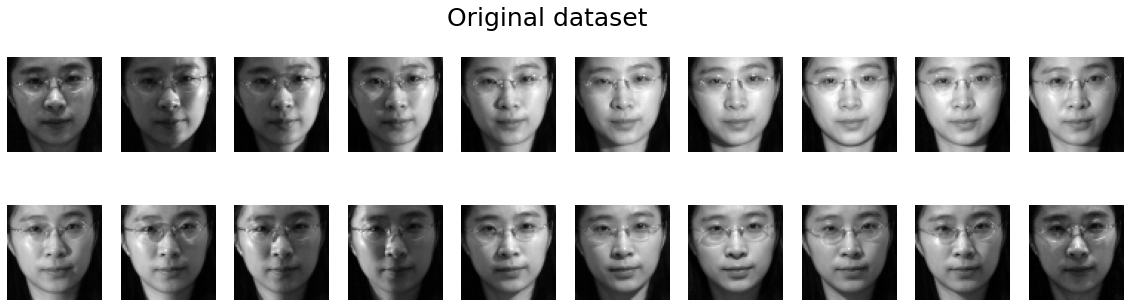

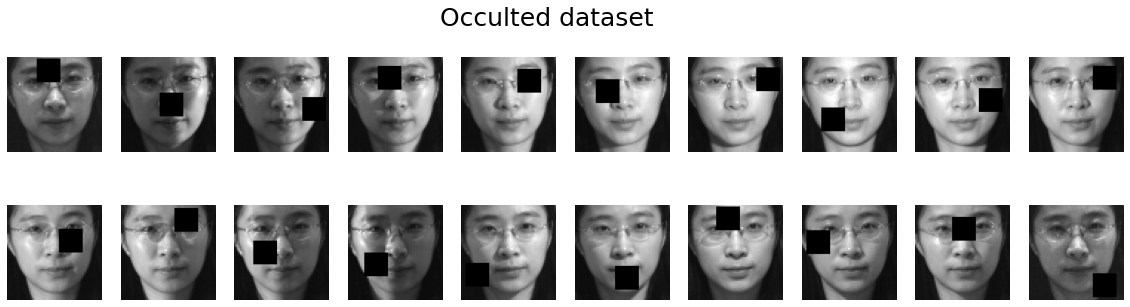

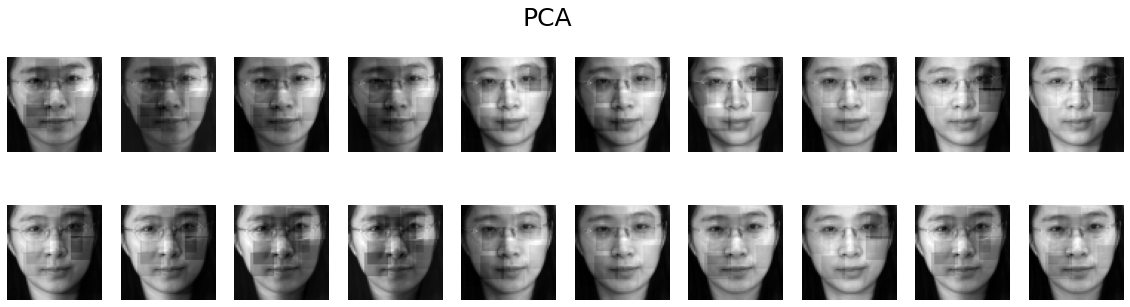

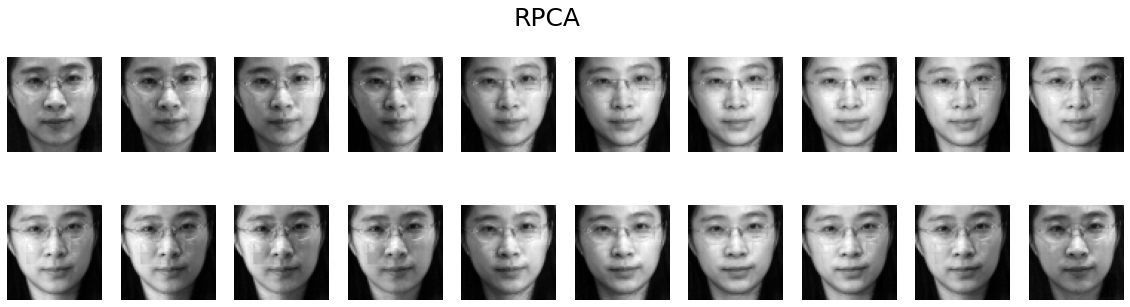

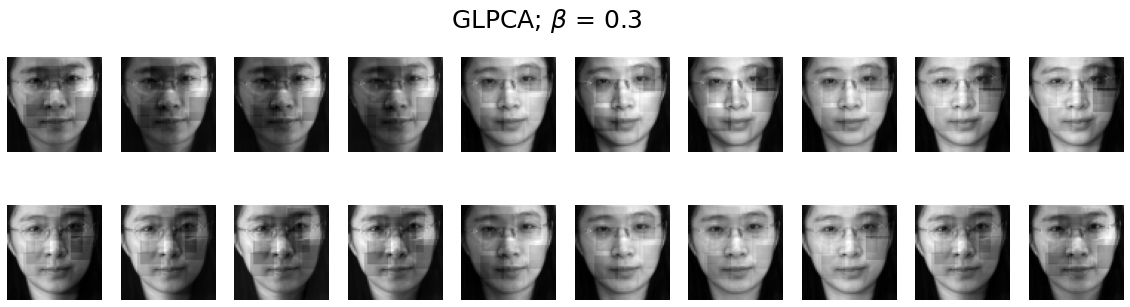

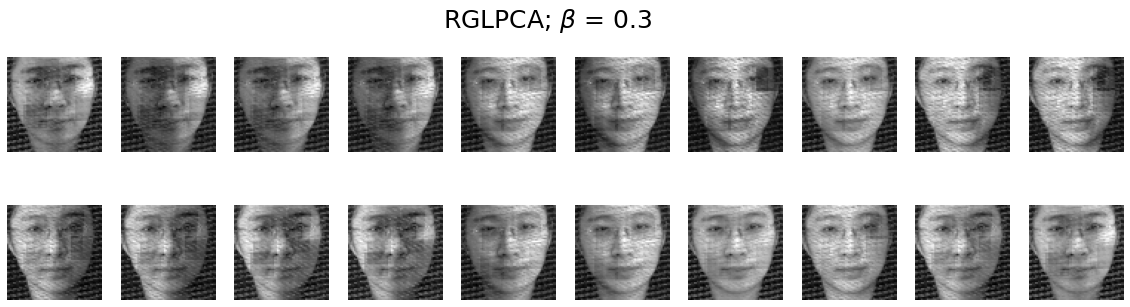

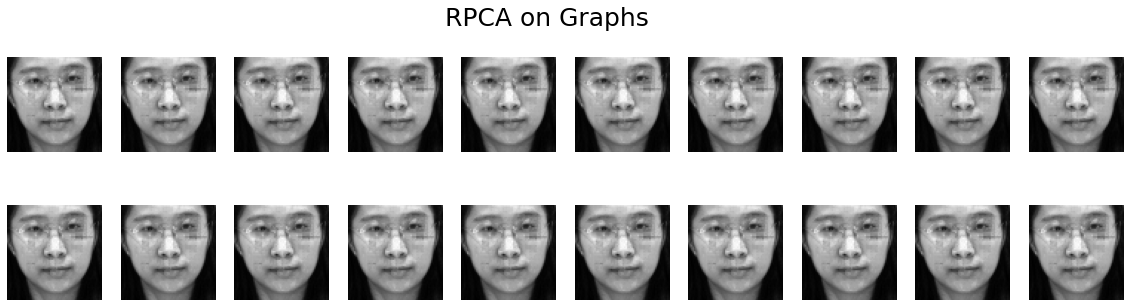

In [4]:
compare_methods("pie", 20, 0.3)

# Clustering test

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import warnings
warnings.filterwarnings("ignore")

np.random.seed(42)

In [18]:
dataset = "att"
n_data_by_class = 10
X_data = load_dataset(dataset, n_data_by_class, "all")

Loading the AT&T dataset...


In [20]:
Q_by_beta = dict()
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, G = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    for beta in [0, 0.3]:
        GlPCA_model = GLPCA(beta = beta, k = 3)
        Q, U = GlPCA_model.fit(X_occulted, G)
        if Q_by_beta.get(beta) is None:
            Q_by_beta[beta] = Q
        else:
            Q_by_beta[beta] = np.concatenate((Q_by_beta[beta], Q), axis=0)

In [26]:
RGLPCA_Q_by_beta = dict()
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, G = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    RGlPCA_model = RGLPCA(beta = 0.3, k = 3)
    Q, U = GlPCA_model.fit(X_occulted, G)
    if RGLPCA_Q_by_beta.get(beta) is None:
        RGLPCA_Q_by_beta[beta] = Q
    else:
        RGLPCA_Q_by_beta[beta] = np.concatenate((RGLPCA_Q_by_beta[beta], Q), axis=0)

In [31]:
Q_RPCA = None
for idx in range(40):
    X_data_class = X_data[idx*n_data_by_class:(idx+1)*n_data_by_class]
    X_occulted, _ = occult_and_generate_graph(X_data_class, dataset, 25, n_data_by_class, n_data_by_class, "random")
    L_RPCA, S_RPCA = evaluate_RPCA(X_occulted, n_data_by_class = n_data_by_class, plot = False)
    U, S, Q = np.linalg.svd(L_RPCA, full_matrices=False)
    if Q_RPCA is None:
        Q_RPCA = Q
    else:
        Q_RPCA = np.concatenate((Q_RPCA, Q), axis=0)

Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmasking...
Training RobustPCA model for unmas

In [22]:
labels_true = np.arange(40).repeat(10)

In [23]:
ARI_list = []
NMI_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(X_data.reshape(400, 112*92))
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
print("Clustering with original data")
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))

Clustering with original data
ARI =  0.6527227081246059
NMI =  0.8808448699783441


In [24]:
ARI_list = []
NMI_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_by_beta[0])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
print("Method : PCA")
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))

Method : PCA
ARI =  0.027021334933420224
NMI =  0.4405326434391921


In [25]:
ARI_list = []
NMI_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_by_beta[beta])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
print("Method : GLPCA, beta = " + str(beta))
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))

Method : GLPCA, beta = 0.3
ARI =  0.05141661561224844
NMI =  0.4777781950078862


In [27]:
ARI_list = []
NMI_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(RGLPCA_Q_by_beta[beta])
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
print("Method : RGLPCA, beta = " + str(beta))
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))

Method : RGLPCA, beta = 0.3
ARI =  0.04826511323738106
NMI =  0.47440270196741396


In [32]:
ARI_list = []
NMI_list = []
for i in range(10):
    kmeans = KMeans(n_clusters=40, random_state=i).fit(Q_RPCA)
    labels_pred = kmeans.labels_
    ARI_list.append(adjusted_rand_score(labels_true, labels_pred))
    NMI_list.append(normalized_mutual_info_score(labels_true, labels_pred))
print("Method : RPCA, beta = " + str(beta))
print("ARI = ", np.max(ARI_list))
print("NMI = ", np.max(NMI_list))

Method : RPCA, beta = 0.3
ARI =  -0.015395416331302545
NMI =  0.3488842379031131
